## Content

- Recap of Kmeans

- Determining the right k

- Time complexity

- Problems with Kmeans

- Kmeans++

- Limitations of Kmeans/ Kmeans++

## Recap of Kmeans

We learnt that there are 2 steps involved in Kmeans algo:

#### 1. Initialization



**What did we do in this step?**

In this step, we initialized k random points

\

**What is k here?**

> k is the number of cluster we want.

#### 2. Iterate till convergence

We do the following in this step:

a. Assign all the points to their nearby cluster centroid.


b. Recompute the centroid.

## Determining the right k

### Loading data

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2024-11-11 00:57:24--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 172.253.122.100, 172.253.122.139, 172.253.122.113, ...
Connecting to drive.google.com (drive.google.com)|172.253.122.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download [following]
--2024-11-11 00:57:24--  https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.179.132, 2607:f8b0:4004:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.179.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139827 (137K) [application/octet-stream]
Saving to: ‘E-commerce.csv’

E-commerce.csv      100%[===================>] 136.55K  --.

In [ ]:
df = pd.read_csv('./E-commerce.csv')
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [ ]:
X=df.drop("ID",axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(2)

components_pca = pca.fit_transform(X)


In [ ]:
def viz_clusters(clusters):
    plt.scatter(clusters['X1'], clusters['X2'], c=clusters['label'], s = 40)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Visualizing Clusters')



### Inertia (Elbow method)

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
kmeans_iter1 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="lloyd", random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", random_state=0)
kmeans_iter3 = KMeans(n_clusters=8, init="random", n_init=1,
                     algorithm="lloyd", random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', n_init=1, random_state=0)

In [ ]:
clusters_1 = pd.DataFrame(components_pca, columns=['X1', 'X2'])
clusters_1['label'] = kmeans_iter1.labels_


clusters_2 = pd.DataFrame(components_pca, columns=['X1', 'X2'])
clusters_2['label'] = kmeans_iter2.labels_


clusters_3 = pd.DataFrame(components_pca, columns=['X1', 'X2'])
clusters_3['label'] = kmeans_iter3.labels_



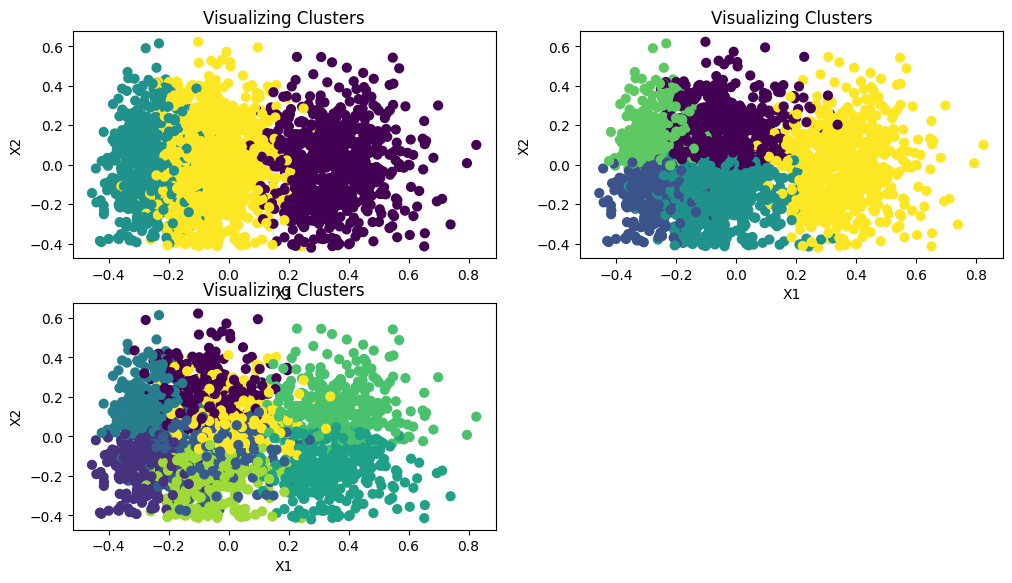

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(321)
viz_clusters(clusters_1)

plt.subplot(322)
viz_clusters(clusters_2)

plt.subplot(323)
viz_clusters(clusters_3)

- So, Yes, the end results of K-Means depends on number of clusters.

**So, how many clusters are ideal? How to pick that?**
  - Using Inertia or WCSS

#### How to select the best model?




In [ ]:
kmeans_iter1.inertia_

280.16509626121064

In [ ]:
kmeans_iter3.inertia_

193.00182851000528

**As we increase the number of clusters, inertia decreases.**

**So, does that mean we should keep increasing the number of clusters for better performance?**

- No, we cannot simply take the value of **K** that minimizes the inertia, since it keeps getting lower as we increase **K**.
- Because, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be.


### Let's experiment with different number of clusters and plot their Inertia



- Calculate the Within Cluster Sum of Squared Errors (WCSS) for different values of K
- Choose the K for which WCSS first starts to diminish.

**The steps can be summarized in the below steps:**
1. Perform K-Means clustering for different values of K by varying K from 1 to 10 clusters.
2. For each K, calculate the total within-cluster sum of square (WCSS).
3. Plot the curve of WCSS vs the number of clusters K.
4. The inflectionion point(elbow) in the plot is generally considered to be an indicator of the appropriate number of clusters.


In [ ]:
# Inertia = Within Cluster Sum of Squares
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

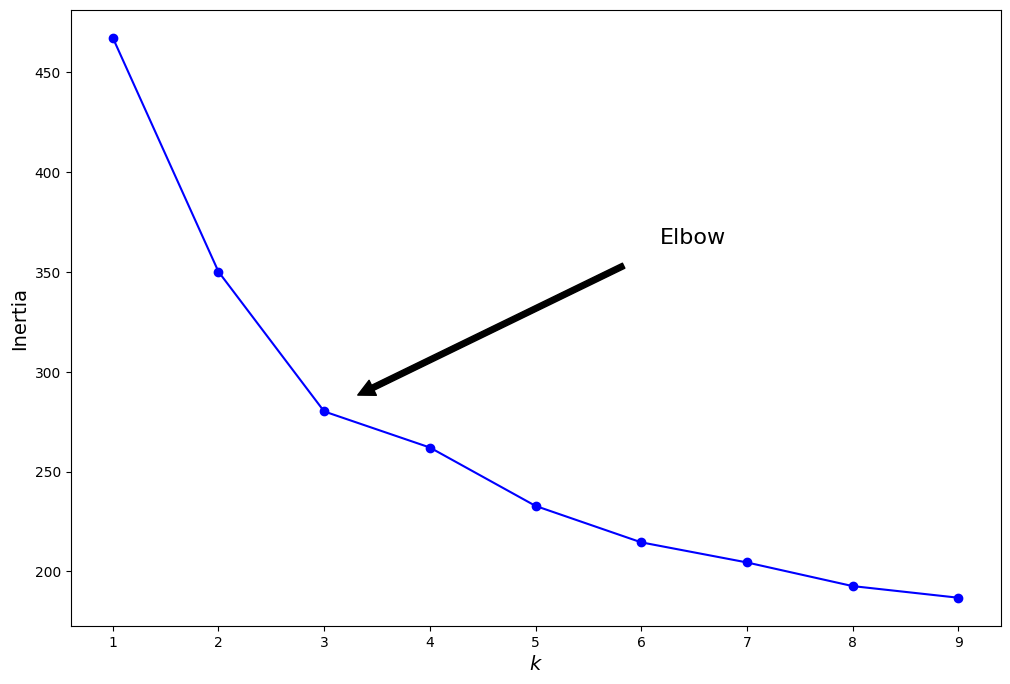

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

- Inflection point is near 3 or 4 where the drops sharply and then slows down
- 3 would be a good choice, any lower value would be dramatic, while any higher value would not help much.

  **The elbow is found when the dataset becomes flat or linear after applying the cluster analysis algorithm.**

But it's not a very precise method

- Elbow curve still relies on human interpretaion of where we see the slope changing.
- It gives a rough estimate only.




Let's try to evaluate the algorithm for different values of k using Silhouette scores.

### SIlhoutte score

In [ ]:
from sklearn.metrics import silhouette_score

k = 4 ## arbitrary value
kmeans = KMeans(n_clusters=k,random_state = 42)
kmeans.fit(X)


KMeans(n_clusters=4, random_state=42)

In [ ]:
## silhouette score for 4 clusters
silhouette_score(X, kmeans.labels_)

0.24019904847942408

In [ ]:
## plot for different values of K
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

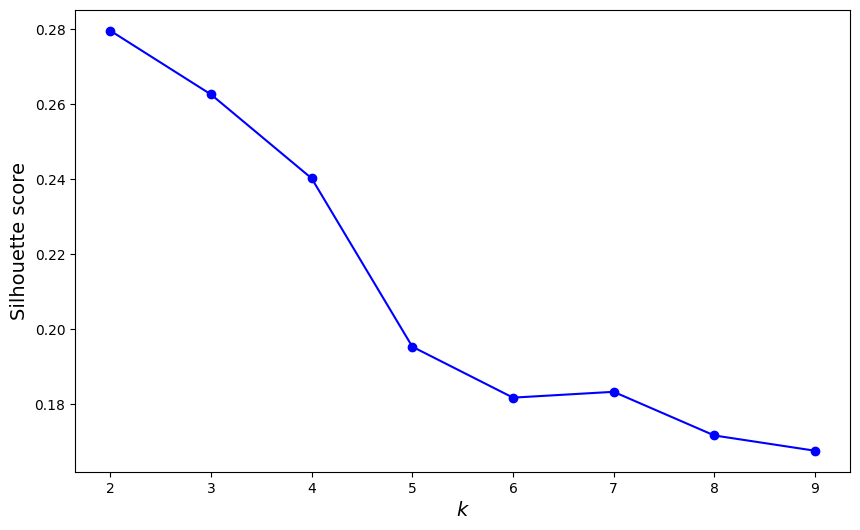

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

- We should pick 2 or 3 because after 3 there is a significant drop in the scores after 3.

- According to Elbow curve we wanted to pick 3 or 4, but according to Silhouette we can pick 2 or 3 therefore by taking common we can use 3.

- Even if we try to analyze the line polar curve, we can observe that the clusters 0 and 1 are quite the same except the difference in days after registration.

The strategy to pick 'K' should be:
1. Use the Silhouette score curve.
2. Use the elbow method.
3. Most importantly use the domain analysis.

The combination of the above 3 should be used for picking the right k.

**Note:** Silhouette Coefficient is only defined if number of labels is `2 <= n_labels <= n_samples - 1`.

#### Why are we not evaluating number of clusters using Dunn index?

sklearn library doesn't have implementation for Dunn index

#### Quiz

# Question
When will inertia reduce to zero?

# Choices

- [ ] All the points belong to same cluster.
- [x] All the points are cluster themselves.
- [ ] Inertia cannot be reduced to zero in clustering.

## Scratch impl of Kmeans

#### Step 1: Recap of K-Means Clustering


K-Means clustering is an unsupervised learning algorithm used to group similar data points into clusters. The algorithm works as follows:
- Initialization: Choose K initial cluster centers (centroids).
- Assignment: Assign each data point to the nearest centroid.
- Update: Recompute the centroids of the clusters based on the assigned data points.
- Repeat: Repeat the assignment and update steps until the centroids no longer change or a maximum number of iterations is reached.


#### Step 2: Import Required Libraries
We need to import numpy for numerical operations and matplotlib.pyplot for visualization.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#### Step 3: Define the K-Means Algorithm

- Initialization: We randomly initialize the centroids.
- Assignment: Assign each point to the nearest centroid.
- Update: Update the centroids based on the mean of the assigned points.

Here’s a step-by-step implementation:


In [ ]:

# Function to initialize centroids
def initialize_centroids(X, K):
    np.random.seed(42)  # For reproducibility
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:K]]
    return centroids


In [ ]:

# Function to assign points to the nearest centroid
def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    clusters = np.argmin(distances, axis=0)
    return clusters


In [ ]:

# Function to update centroids
def update_centroids(X, clusters, K):
    new_centroids = np.array([X[clusters == k].mean(axis=0) for k in range(K)])
    return new_centroids


In [ ]:

# K-Means algorithm
def k_means(X, K, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, K)
    for i in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, K)

        # Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tol):
            break

        centroids = new_centroids

    return centroids, clusters




#### Step 4: Generate Some Data for Testing

Let's generate some synthetic data to test our implementation.


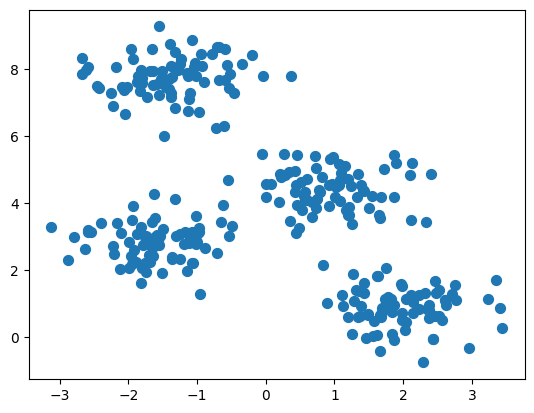

In [ ]:
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.show()


#### Step 5: Apply the K-Means Algorithm



In [ ]:
# Now we apply our K-Means algorithm to the generated data.
K = 4
centroids, clusters = k_means(X, K)


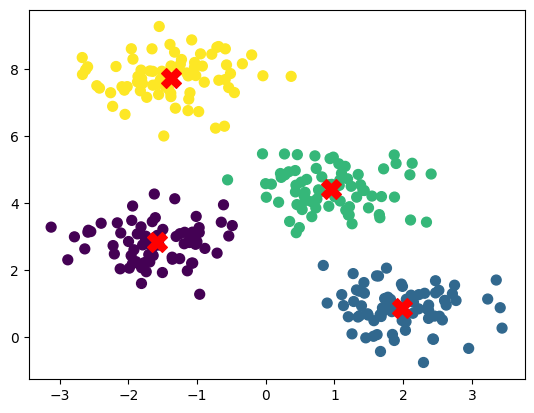

In [ ]:

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
plt.show()


Explanation:

- Initialization: Initialize_centroids
    - selects K random points from the dataset as the initial centroids.

- Assignment:
    - assign_clusters calculates the distance from each point to each centroid and assigns each point to the nearest centroid.

- Update:
    - update_centroids computes the new centroids as the mean of all points assigned to each centroid.

- Repeat:
    - The algorithm iterates over the assignment and update steps until the centroids stabilize or the maximum number of iterations is reached.

## Time complexity of Kmeans

The time complexity of Kmeans means is:

$$O(n*k*d*i)$$

where
- n : number of datapoints
- k : number of clusters
- d : number of dimension of a datapoint
- i : number of iterations

### How did we arrive at this ?

Recall that in Kmeans


For each iteration (i):
- and for each centroid (k)
    - we find the distance of all point (n points of d -dim ) w.r.t that centroid
    - and based on distance , we assign it nearest cluster









Now, there are nested loop running here
- First for iteration (i iteration) <= convergence
- Second for each centroid (k centroid)
    - finding distance of each point with dim vector (n*d)


Hence, the time complexity comes out to be:

$$O(n*d*k*i)$$

Typically,

- k ≤ 10
- i ≤ 300

So, compared to the values of $n$ and $d$, we can ignore terms $k$ and $i$

So, we can approximate it to:

$$O(n*d)$$



Note that:
- The time complexity is in linear time

## Problems of Kmeans

Although the algo is simple, there is one major flaw in kmeans
- i.e. initialization

### What is the issue with initialization ?

This means, that the same data, with different initialization, will get different results (different clusters)

Let's try to understand it using an visualization:

link: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

#### Initialization 1

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/681/original/kmeans56.gif?1711944276' width="800"></center>











#### Initialization 2

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/682/original/kmeans57.gif?1711944399' width="800"></center>













#### Initialization 3

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/683/original/kmeans58.gif?1711944447' width="800"></center>






Notice the 3rd initialization

- it is not giving us good clusters

i.e. it is getting stuck in local minima.

To summarize:

- Different init may lead to different clustering result

- There is a chance that bad init can lead to suboptimal solution


* In Optimal Clustering results, results are sensible
* In Sub-Optimal Clustering, which probably doesn't make sense and won't be an optimal one


link: https://cs.wmich.edu/alfuqaha/summer14/cs6530/lectures/ClusteringAnalysis.pdf

Alternative link: https://drive.google.com/file/d/1ok4aGA1AZna3XyodOrLO8DYbZImpI7l9/view?usp=sharing


<center><img src="https://drive.google.com/uc?export=view&id=1_8XrEVwmo47dHUkJfNKXXtF1CQE5eMG2" width=800></center>


#### How to deal with initialization problem in K-Means?



Remember dunn index from previous lecture;
  $D = \Large\frac{min_{i,j} distance(i,j)}{max_k distance^{'}(k)}$; where,

- distance(i,j) → distance between the farthest points of the clusters $C_i$ and $C_j$ → **Inter-Cluster distance**



We also learnt Lloyd's Algorithm in the previous lecture in which we randomly intialize the centroids and based on the distances of centroids, we keep updating them until convergence.

- One way to deal with initialization problem would be to
    - try different initializations for Lloyd's Algorithm
    - and pick the best one out of it based on Dunn Index or any other evaluation metric

But, this is a **brute force approach**








<center><img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/685/original/kmeans59.png?1711945819" width=800></center>




#### Isn't there any better solution?

This brings us to another algorithm: **K-Means++**

## Kmeans++

Consider a data where we want to initialize 3 centroids.
- We pick first centroid at random

Now, instead of picking second centroid at random,
- we want to pick a point that is as far away as possible

### Why pick a centroid that is far away?


Because, if you think about it,
- if we pick two centroids closer to each other, we'll get two clusters for that region of data points.



#### What's the problem in getting two clusters instead of a single one?



Most of the times data points belonging to the same region will share similar characteristics and they should ideally belong to one cluster, instead of two.






<center><img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/686/original/kmeans60.gif?1711946868" width=800></center>






#### Do you see any issue with this approach ?

There's a little risk in this approach.

- If we select a datapoint as a second centroid with the farthest distance,
- then an outlier might be picked as a centroid, and we might have a cluster with only outlier in it

Let's see it visually

link: https://hckr.pl/k-means-visualization/


<center><img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/688/original/kmeans61.gif?1711947906" width=800></center>








#### Q. Is there a way to avoid picking an outlier as a centroid?


Yes!

- Instead of picking a centroid deterministically, we can pick a centroid probabilistically

- We do this in such a way that the probability of picking a centroid is proportional to the distance from the first centroid $C_{1}$

- This concept works really well unless there is an outlier with crazy high values



<center><img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/069/700/original/kmeans62.png?1711951594" width=800></center>

#### Now, how to pick next centroids?
- For all points, we will compute the distance: dist($C_{1}, X_{i}$) + dist($C_{2}, X_{i}$) such that $X_{i} \in D$ - ${C_{1}, C_{2} }$
- This will distances from both $C_{1}$ and $C_{2}$ (average them)
- Now, pick a point probabilistcally

- So, for picking $K$ centroids,

    - we pick first centroid randomly,
    - and then we pick ${i}^{th}$ centroid in the **probabilistic** fashion as a point which has the highest from all the previously chosen centroids.


This is what makes Kmeans++ better at initialization when compared to Kmeans.

#### Quiz

# Question
In K-Means++, how are subsequent centroids selected after the first one?


# Choices

- [ ] Randomly from the dataset.
- [ ] Deterministically based on their order in the dataset.
- [x] Probabilistically based on the average distance from previously chosen centroids.
- [ ] By always selecting the farthest point from the previous centroid.

## Limitation of KMeans/KMeans++

Viz link: https://hckr.pl/k-means-visualization/

Doc links

link: https://cs.wmich.edu/alfuqaha/summer14/cs6530/lectures/ClusteringAnalysis.pdf

Alternative link: https://drive.google.com/file/d/1ok4aGA1AZna3XyodOrLO8DYbZImpI7l9/view?usp=sharing


### **Differing Size**



Because of the way Lloyd's algorthm work, K-Means always tries to make clusters of same size



<img src="https://drive.google.com/uc?export=view&id=1DKEwQtMCsrBcstUzLOlX06wkMBvJjiCO" width=800>

#### How can we solve this?



- One way of solving this problem would be to increase the value of K.
- Once clusters are formed, the similar clusters can be grouped together to form a mega cluster.
- The problem with this approach is the grouping of similar clusters is not easy



<center><img src="https://drive.google.com/uc?export=view&id=1GMiOosbfxOt4O3G-uplE5Iu7Xt24BZmd" width=800></center>
<center><img src="https://drive.google.com/uc?export=view&id=1x-XLirB4SUdnaqfnmxaYZOXWlpxF-RwL" width = 800></center>

### **Differing Density**



K-Means is not good when you've clusters of different density, not even K-Means ++



<center><img src="https://drive.google.com/uc?export=view&id=18s3PCi_JVCaxSqgXSJmewy9wP26GeGM2" width=800></center>

### **Non-Globular Shapes**



Another limitation of K-Means is that it cannot work on non-globular shapes, i.e. Non- spherical shapes



<center><img src="https://drive.google.com/uc?export=view&id=15ELbeS7zULGstT8Zsx3fF-AB1L7eSh_L" width=800></center>

#### What are some Hacks for dealing with Non-Globular Shapes?

- For dealing with the problem of differing densities and non-globular shapes, same idea of increasing the value of $K$, and then combining similar clusters can be applied

- This is fairly hard to combine let alone visualize in multi-dimensional space

**Note:** These limitations are also shared by KMeans++.

<center><img src="https://drive.google.com/uc?export=view&id=1afKW-pXFDVFUJwslqsspJ5HcNWbvqM_2" width=800></center>